# RIP.ie daily death data (v2)

* rip.ie
* http://dmnfarrell.github.io/
* https://data.gov.ie/dataset/list-of-nursing-homes-in-ireland/resource/489aad00-cad1-41d7-92bf-8b5cdd9d61ea



In [41]:
import pandas as pd
import pylab as plt
import numpy as np
import seaborn as sns
import matplotlib as mpl
import pylab as plt
import matplotlib.dates as mdates

pd.set_option('display.width', 150)
locator = mdates.AutoDateLocator(minticks=4, maxticks=10)
formatter = mdates.ConciseDateFormatter(locator)
sns.set_style("white")
sns.set_context('talk')

In [42]:
df = pd.read_csv('rip_dn_scrape_processed.csv',index_col=0)
df['date'] = pd.to_datetime(df.date,format='%d/%m/%Y',errors='coerce')
df = df.sort_values('date')
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['day'] = df.date.dt.dayofyear
df['week'] = df.date.dt.weekofyear

df = df[df.year>=2018]

<ipython-input-42-838bd2fc379e>:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['week'] = df.date.dt.weekofyear


In [43]:
df.loc[406203]

name                                           Jackie  Flynn
date                                     2019-12-05 00:00:00
address         *Fortwilliam* Greatmeadow, Boyle,  Roscommon
notice     Peacefully at Sligo University Hospital. Sadly...
county                                                 Sligo
year                                                    2019
month                                                     12
day                                                      339
week                                                      49
Name: 406203, dtype: object

In [13]:
nhomes = pd.read_csv('nursing_homes.csv')
nhomes['shortname'] = nhomes['Service name'].apply(lambda x: x.split('Nursing')[0])
#print (nhomes[:10])
homenames = nhomes.shortname

def find_nhome(x):
    for h in homenames:
        if h in x:
            return h
    
#df['home'] = df.notice.apply(lambda x: find_nhome(x))
#print (df[~df.home.isnull()])

In [25]:
female=list(pd.read_csv('female_names.csv')['name'].str.lower())
def check_name(x):
    if type(x) is float:
        return
    if 'née' in x:
        return 'F'    
    s = x.split(' ')[0].strip()
    #handle double names
    s = s.split()
    for n in s:       
        if n.strip("()").lower() in female:            
            return 'F'
        if n.strip("()").lower() in male:    
            return 'M' 
    return 'U'
    
#df['sex'] = df['name'].apply(check_name)
#df.sex.value_counts()

year
2018     7050
2019    17357
2020    32023
2021    16141
dtype: int64


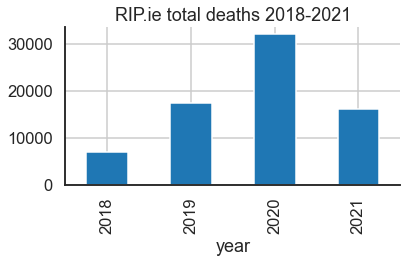

In [44]:
totals = df.groupby('year').agg('size')
print (totals)
ax=totals.plot(kind='bar',grid=True)
plt.title('RIP.ie total deaths 2018-2021')
sns.despine()
plt.tight_layout()
#plt.savefig('ireland_deaths_ripie_summary.png',dpi=100)

year
2018     7050.0
2019    17357.0
2020    32023.0
2021    16141.0
dtype: float64


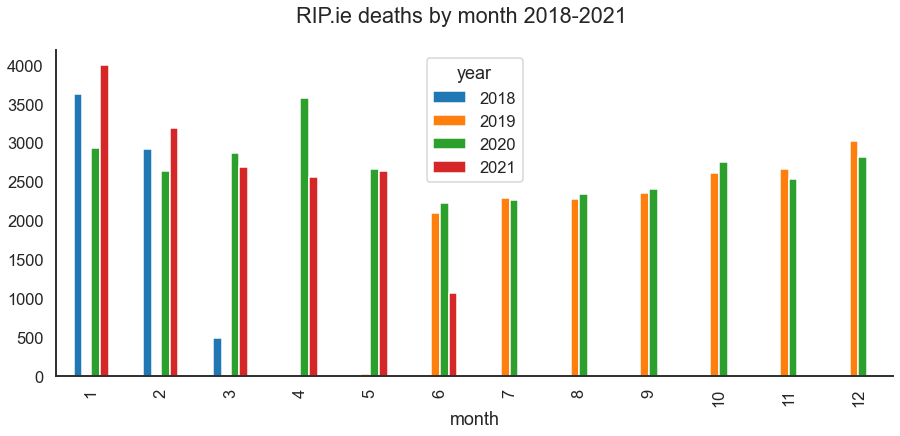

In [45]:
bymonth = pd.pivot_table(df, index='month',columns='year',values='name',aggfunc='size')
print (bymonth.sum())
bymonth.plot(kind='bar',figsize=(15,6))
#bymonth.to_csv('rip_deaths_monthly.csv')
plt.suptitle('RIP.ie deaths by month 2018-2021')
sns.despine()
plt.savefig('ireland_deaths_ripie_bymonth_v2.png',dpi=150)

In [ ]:
gro = pd.read_csv('gro_deaths.csv')
a=bymonth.reset_index()
a.columns=['month','2019','2020','2021']
b=gro.merge(a,on='month',suffixes=['_GRO','_RIP'])
#b.sum().plot(kind='bar',figsize=(15,6))
print (b)
f,ax=plt.subplots(1,1,figsize=(7,7))
b.plot(x='2020_GRO',y='2020_RIP',c='0.1',s=100,kind='scatter',grid=True,ax=ax)
ax.plot([2400, 3300], [2400, 3300], ls='--')

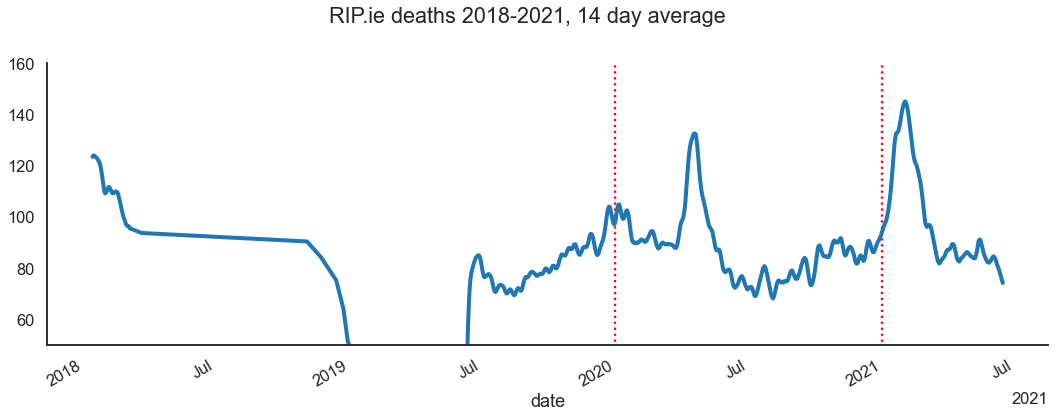

In [47]:
x = df.groupby('date').size()
ax=x.rolling(14,win_type='hamming').mean().plot(lw=4,figsize=(15,6),ylim=(50,160))
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.vlines(pd.to_datetime('2019-12-31'),0,160,color='r',ls=':')
ax.vlines(pd.to_datetime('2020-12-31'),0,160,color='r',ls=':')
plt.suptitle('RIP.ie deaths 2018-2021, 14 day average')
sns.despine()
plt.tight_layout()
plt.savefig('ireland_deaths_ripie_trend_v2.png',dpi=150)

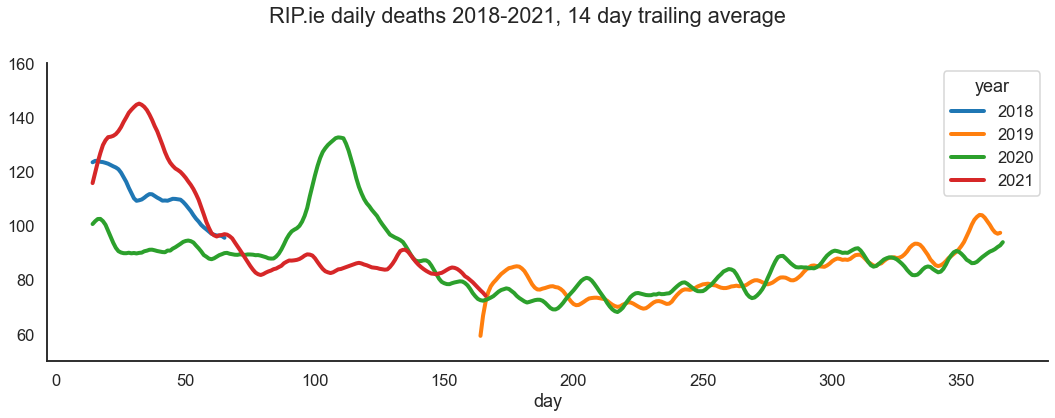

In [48]:
byday = pd.pivot_table(df, index='day',columns='year',values='name',aggfunc='size')
meanday = byday.rolling(window=14,win_type='hamming').mean()
meanday.plot(figsize=(15,6),ylim=(50,160),lw=4)
sns.despine()
plt.suptitle('RIP.ie daily deaths 2018-2021, 14 day trailing average')
plt.tight_layout()
plt.savefig('ireland_deaths_ripie_compared_mean_v2.png',dpi=150)